In [6]:
%load_ext autoreload
%autoreload 2
import sys
import importlib
from io import StringIO  # for loading pandas dataframe from literal string
from pathlib import Path
import numpy as np
import pandas as pd

%gui qt5
import pyqtgraph as pg
from pyqtgraph.Qt import QtCore, QtGui, QtWidgets # pyqtgraph is only currently used for its Qt imports


import vedo
from vedo import *

from pyphocorehelpers.plotting.vedo_qt_helpers import MainVedoPlottingWindow

from pyphoplacecellanalysis.General.Mixins.DisplayHelpers import debug_print_axes_locations
# from pyphoplacecellanalysis.GUI.PyQtPlot.Flowchart.CustomNodes.Mixins.DisplayNodeViewHelpers import ProducedViewType
# from pyphoplacecellanalysis.GUI.PyQtPlot.Flowchart.pyqtplot_Flowchart import plot_flowchartWidget
from pyphoplacecellanalysis.General.DataSeriesToSpatial import DataSeriesToSpatial # for DataSeriesToSpatial.build_minute_x_tick_labels(...) function

from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike3DRaster_Vedo import Spike3DRaster_Vedo, StaticVedo_3DRasterHelper
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.spike_raster_widgets import build_spike_3d_raster_vedo_with_2d_controls, build_spike_3d_raster_with_2d_controls

from pyphoplacecellanalysis.GUI.Vedo.VedoMeshManipulatable import VedoPlotterHelpers
from pyphocorehelpers.gui.Vedo.vedo_helpers import VedoHelpers


%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:

data_output_directory = Path('../../data')
# data_output_directory.exists()
meshes_cache_data_output_directory = data_output_directory.joinpath('mesh_caches') # '../../data/mesh_caches/'
meshes_cache_data_output_directory.mkdir(exist_ok=True, parents=False)

example_epoch_data_csv_string = StringIO(""",start,stop,duration,label\r\n0,57.32,57.472,0.15200000000000102,\r\n1,78.83,79.154,0.32399999999999807,\r\n2,80.412,80.592,0.1799999999999926,\r\n3,83.792,84.07000000000001,0.2780000000000058,\r\n4,85.005,85.144,0.13900000000001,\r\n5,89.348,89.759,0.41100000000000136,\r\n6,93.95,94.115,0.16499999999999204,\r\n7,99.805,99.936,0.13100000000000023,\r\n8,125.276,125.418,0.14200000000001012,\r\n9,139.835,140.15800000000002,0.3230000000000075,\r\n10,147.648,147.842,0.19400000000001683,\r\n11,148.927,149.068,0.14100000000001955,\r\n12,176.844,177.33,0.4860000000000184,\r\n13,183.631,183.874,0.242999999999995,\r\n14,201.058,201.257,0.19900000000001228,\r\n15,212.357,212.516,0.15899999999999181,\r\n16,240.886,241.019,0.13300000000000978,\r\n17,242.76500000000001,242.91400000000002,0.1490000000000009,\r\n18,245.6,245.937,0.3370000000000175,\r\n19,248.00400000000002,248.139,0.1349999999999909,\r\n20,274.12600000000003,274.516,0.38999999999998636,\r\n21,299.409,299.624,0.21500000000003183,\r\n22,300.184,300.308,0.1239999999999668,\r\n23,305.567,306.325,0.7579999999999814,\r\n24,318.704,318.944,0.2400000000000091,\r\n25,321.404,321.594,0.18999999999999773,\r\n26,327.33,327.596,0.26600000000001955,\r\n27,331.399,331.54,0.14100000000001955,\r\n28,333.931,334.101,0.17000000000001592,\r\n29,336.473,336.608,0.1349999999999909,\r\n30,339.333,339.502,0.16899999999998272,\r\n31,342.207,342.324,0.11700000000001864,\r\n32,342.411,342.586,0.17500000000001137,\r\n33,345.411,345.60200000000003,0.19100000000003092,\r\n34,353.54900000000004,353.796,0.24699999999995725,\r\n35,367.128,367.333,0.20500000000004093,\r\n36,368.848,369.039,0.19099999999997408,\r\n37,370.661,370.91700000000003,0.25600000000002865,\r\n38,373.08,373.371,0.2909999999999968,\r\n39,379.355,379.601,0.2459999999999809,\r\n40,380.404,380.509,0.10500000000001819,\r\n41,385.653,385.889,0.23599999999999,\r\n42,386.428,386.615,0.18700000000001182,\r\n43,392.867,393.03700000000003,0.17000000000001592,\r\n44,398.271,398.648,0.37700000000000955,\r\n45,400.012,400.219,0.20699999999999363,\r\n46,401.11,401.399,0.28899999999998727,\r\n47,404.916,405.072,0.1560000000000059,\r\n48,407.197,407.445,0.24799999999999045,\r\n49,416.095,416.366,0.27099999999995816,\r\n50,417.294,417.683,0.38900000000001,\r\n51,427.039,427.161,0.1220000000000141,\r\n52,430.531,430.757,0.2259999999999991,\r\n53,434.69,434.837,0.14699999999999136,\r\n54,435.822,435.92900000000003,0.10700000000002774,\r\n55,456.574,456.927,0.35300000000000864,\r\n56,478.076,478.354,0.27799999999996317,\r\n57,483.985,484.212,0.22699999999997544,\r\n58,489.569,489.724,0.15499999999997272,\r\n59,491.58,491.735,0.15500000000002956,\r\n60,492.742,492.954,0.21199999999998909,\r\n61,498.669,498.818,0.1490000000000009,\r\n62,519.033,519.176,0.1430000000000291,\r\n63,529.016,529.197,0.18100000000004002,\r\n64,535.8290000000001,535.999,0.16999999999995907,\r\n65,540.38,540.623,0.24300000000005184,\r\n66,543.284,543.476,0.19200000000000728,\r\n67,547.034,547.271,0.23699999999996635,\r\n68,550.17,550.294,0.12400000000002365,\r\n69,553.788,553.917,0.1290000000000191,\r\n70,554.763,555.0360000000001,0.27300000000002456,\r\n71,563.53,563.695,0.1650000000000773,\r\n72,566.97,567.256,0.2859999999999445,\r\n73,567.918,568.093,0.17499999999995453,\r\n74,573.824,574.014,0.19000000000005457,\r\n75,577.3770000000001,577.532,0.15499999999997272,\r\n76,585.466,585.687,0.22100000000000364,\r\n77,592.663,593.003,0.34000000000003183,\r\n78,594.552,594.77,0.2179999999999609,\r\n79,598.635,598.773,0.13800000000003365,\r\n80,600.773,600.884,0.11099999999999,\r\n81,602.885,603.118,0.23300000000006094,\r\n82,611.827,611.943,0.11599999999998545,\r\n83,615.653,615.794,0.1409999999999627,\r\n84,618.146,618.355,0.20900000000006003,\r\n85,624.298,624.426,0.12800000000004275,\r\n86,627.626,627.794,0.16800000000000637,\r\n87,645.028,645.294,0.2659999999999627,\r\n88,657.562,657.87,0.3079999999999927,\r\n89,660.967,661.351,0.38400000000001455,\r\n90,667.472,667.705,0.23300000000006094,\r\n91,672.054,672.269,0.21500000000003183,\r\n92,680.97,681.25,0.2799999999999727,\r\n93,689.048,689.25,0.20199999999999818,\r\n94,694.205,694.418,0.21299999999996544,\r\n95,695.519,695.662,0.1430000000000291,\r\n96,702.464,702.664,0.1999999999999318,\r\n97,703.864,704.014,0.14999999999997726,\r\n98,707.251,707.468,0.21699999999998454,\r\n99,708.61,708.7470000000001,0.1370000000000573,\r\n100,713.5260000000001,713.785,0.25899999999990087,\r\n101,718.119,718.242,0.1229999999999336,\r\n102,721.128,721.293,0.16499999999996362,\r\n103,731.023,731.184,0.16099999999994452,\r\n104,732.316,732.541,0.22500000000002274,\r\n105,745.001,745.157,0.15600000000006276,\r\n106,762.33,762.52,0.18999999999994088,\r\n107,770.556,770.745,0.18899999999996453,\r\n108,772.206,772.5310000000001,0.3250000000000455,\r\n109,777.561,778.465,0.9039999999999964,\r\n110,788.6220000000001,788.783,0.16099999999994452,\r\n111,794.7810000000001,795.014,0.23299999999994725,\r\n112,803.999,804.3000000000001,0.30100000000004457,\r\n113,806.559,806.687,0.12800000000004275,\r\n114,807.407,807.7570000000001,0.35000000000002274,\r\n115,812.899,813.029,0.12999999999999545,\r\n116,815.054,815.168,0.11400000000003274,\r\n117,819.519,819.628,0.10900000000003729,\r\n118,820.695,821.0310000000001,0.33600000000001273,\r\n119,828.7810000000001,829.119,0.33799999999996544,\r\n120,831.056,831.375,0.31899999999996,\r\n121,833.678,833.813,0.1349999999999909,\r\n122,837.658,838.614,0.9560000000000173,\r\n123,861.128,861.3720000000001,0.2440000000000282,\r\n124,863.915,864.186,0.27100000000007185,\r\n125,876.171,876.3720000000001,0.20100000000002183,\r\n126,881.962,882.1800000000001,0.21800000000007458,\r\n127,890.326,890.4540000000001,0.12800000000004275,\r\n128,892.698,892.89,0.19200000000000728,\r\n129,908.196,908.415,0.21899999999993724,\r\n130,919.932,920.143,0.21100000000001273,\r\n131,935.4590000000001,935.706,0.24699999999995725,\r\n132,939.331,939.485,0.15399999999999636,\r\n133,943.789,944.022,0.23300000000006094,\r\n134,965.4590000000001,965.745,0.2859999999999445,\r\n135,981.674,981.91,0.23599999999999,\r\n136,983.785,984.0020000000001,0.21700000000009823,\r\n137,1016.335,1016.476,0.1409999999999627,\r\n138,1017.761,1017.957,0.19600000000002638,\r\n139,1029.26,1029.422,0.16200000000003456,\r\n140,1030.044,1030.194,0.14999999999986358,\r\n141,1037.156,1037.432,0.2760000000000673,\r\n142,1045.623,1045.782,0.15899999999987813,\r\n143,1046.897,1047.448,0.5510000000001583,\r\n144,1049.864,1050.067,0.20299999999997453,\r\n145,1063.924,1064.159,0.23500000000012733,\r\n146,1068.26,1068.577,0.3170000000000073,\r\n147,1081.695,1081.827,0.13200000000006185,\r\n148,1083.282,1083.494,0.21199999999998909,\r\n149,1085.09,1085.301,0.21100000000001273,\r\n150,1104.819,1105.198,0.3790000000001328,\r\n151,1111.363,1111.74,0.3769999999999527,\r\n152,1134.018,1134.199,0.18100000000004002,\r\n153,1136.71,1136.9,0.19000000000005457,\r\n154,1142.528,1142.748,0.22000000000002728,\r\n155,1181.758,1181.904,0.14599999999995816,\r\n156,1189.151,1189.278,0.1269999999999527,\r\n157,1194.279,1194.549,0.2699999999999818,\r\n158,1224.21,1224.3790000000001,0.1690000000000964,\r\n159,1228.653,1228.82,0.16699999999991633,\r\n160,1230.519,1230.699,0.18000000000006366,\r\n161,1233.843,1233.9470000000001,0.10400000000004184,\r\n162,1239.08,1239.25,0.17000000000007276,\r\n163,1240.618,1240.72,0.10200000000008913,\r\n164,1250.0240000000001,1250.147,0.12299999999981992,\r\n165,1253.343,1253.536,0.19299999999998363,\r\n166,1256.728,1256.932,0.2039999999999509,\r\n167,1266.395,1266.71,0.31500000000005457,\r\n168,1276.409,1276.555,0.14599999999995816,\r\n169,1304.038,1304.228,0.19000000000005457,\r\n170,1313.451,1313.576,0.125,\r\n171,1316.15,1316.39,0.2400000000000091,\r\n172,1317.462,1317.6580000000001,0.19600000000014006,\r\n173,1337.51,1337.741,0.23099999999999454,\r\n174,1359.215,1359.346,0.1310000000000855,\r\n175,1367.954,1368.069,0.1150000000000091,\r\n176,1377.606,1377.751,0.1449999999999818,\r\n177,1388.288,1389.159,0.8710000000000946,\r\n178,1390.621,1390.917,0.29599999999982174,\r\n179,1393.832,1393.993,0.16099999999983083,\r\n180,1428.15,1428.432,0.2819999999999254,\r\n181,1429.087,1429.238,0.1510000000000673,\r\n182,1441.0,1441.124,0.12400000000002365,\r\n183,1453.997,1454.2920000000001,0.29500000000007276,\r\n184,1464.442,1464.605,0.16300000000001091,\r\n185,1467.941,1468.257,0.3160000000000309,\r\n186,1473.903,1474.051,0.14799999999991087,\r\n187,1500.933,1501.179,0.2460000000000946,\r\n188,1508.7930000000001,1509.09,0.2969999999997981,\r\n189,1510.001,1510.19,0.18900000000007822,\r\n190,1514.893,1515.008,0.1150000000000091,\r\n191,1517.015,1517.209,0.19399999999995998,\r\n192,1525.5430000000001,1525.7,0.15699999999992542,\r\n193,1528.416,1528.553,0.13700000000017099,\r\n194,1544.021,1544.2250000000001,0.20400000000017826,\r\n195,1558.1290000000001,1558.4170000000001,0.2880000000000109,\r\n196,1561.311,1561.509,0.19800000000009277,\r\n197,1584.151,1584.343,0.19200000000000728,\r\n198,1609.8700000000001,1610.194,0.32399999999984175,\r\n199,1624.631,1624.739,0.10799999999994725,\r\n200,1627.07,1627.257,0.1870000000001255,\r\n201,1643.512,1643.777,0.26500000000010004,\r\n202,1714.259,1714.422,0.16300000000001091,\r\n203,1715.307,1715.49,0.18299999999999272,\r\n204,1729.6870000000001,1729.806,0.11899999999991451,\r\n205,1730.93,1731.099,0.16899999999986903,\r\n""")
test_epochs_df = pd.read_csv(example_epoch_data_csv_string, sep=",")
test_epochs_df

# Load the saved .h5 spikes dataframe for testing:
# finalized_output_cache_file='../../pipeline_cache_store.h5'
finalized_output_cache_file = data_output_directory.joinpath('pipeline_cache_store.h5') # '../../data/pipeline_cache_store.h5'
active_config_name = 'maze1'
desired_spikes_df_key = f'/filtered_sessions/{active_config_name}/spikes_df'
desired_positions_df_key = f'/filtered_sessions/{active_config_name}/pos_df'
spikes_df = pd.read_hdf(finalized_output_cache_file, key=desired_spikes_df_key)
pos_df = pd.read_hdf(finalized_output_cache_file, key=desired_positions_df_key)

In [ ]:
import numpy as np
from vedo import Plotter, shapes
import math

def radial_histogram(data, bins=12):
    hist, edges = np.histogram(data, bins=bins, range=(0, 2*math.pi))
    max_count = max(hist)
    plt = Plotter()
    for i in range(bins):
        angle_start = edges[i]
        angle_end = edges[i+1]
        radius = hist[i] / max_count
        wedge = shapes.Wedge(pos=(0,0,0),
                             r=radius,
                             r2=0,
                             angle1=np.degrees(angle_start),
                             angle2=np.degrees(angle_end),
                             res=30,
                             c="blue",
                             alpha=0.5)
        plt.add(wedge)
    plt.show()


data = np.random.uniform(0, 2*math.pi, 1000)
radial_histogram(data, bins=24)

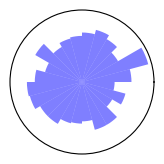

<PolarAxes: >

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def radial_histogram(data, bins=12, offset=(0,0), ax=None):
    own_fig = False
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='polar')
        own_fig = True
    ax.set_position([offset[0], offset[1], 0.3, 0.3])
    counts, edges = np.histogram(data, bins=bins, range=(0, 2*np.pi))
    widths = np.diff(edges)
    ax.bar(edges[:-1], counts, width=widths, bottom=0, align='edge', color='blue', alpha=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    if own_fig:
        plt.show()
    return ax

data = np.random.uniform(0, 2*np.pi, 1000)
radial_histogram(data, bins=24)


# Examples

In [ ]:
# """Color lines by a scalar
# Click the lines to get their lenghts"""
# pts1 = [(sin(x/8), cos(x/8), x/5) for x in range(25)]
# l1 = Line(pts1).c('black')
# l2 = l1.clone().rotateZ(180).shift(1,0,0)

# dist = mag(l1.points()-l2.points())  # make up some scalar values

# # The trick here is to think that the "body" of a line is a cell
# # so we can color cells as we do for any other polygonal mesh:
# lines = Lines(l1, l2).lw(8).cmap('Accent', dist, on='cells').addScalarBar('length')

# def clickfunc(evt):
#     if evt.actor:
#         idl = evt.actor.closestPoint(evt.picked3d, returnCellId=True)
#         print('clicked line', idl, 'length =', precision(dist[idl],3))

# plt = Plotter(axes=1, bg2='lightblue')
# plt.addCallback('mouse click', clickfunc)
# plt.show(l1,l2, lines, __doc__, viewup='z').close()

In [ ]:
settings.allowInteraction = 1

In [ ]:
"""Customizing axes style
(40+ control parameters!)
Title font: """
from vedo import Box, Lines, Points, Spline, show, settings

settings.defaultFont = 'Theemim'

# an invisible box:
world = Box(pos=(2.7,0,0), size=(12,10,8), alpha=0)

# a dummy spline with its shadow on the xy plane
pts = Points([(-2,-3.2,-1.5), (3,-1.2,-2), (7,3,4)], r=12)
spl = Spline(pts, res=50).addShadow(plane='z', point=-4) # make spline and add its shadow at z=-4
lns = Lines(spl, spl.shadows[0])                         # join spline points with its own shadow

# make a dictionary of axes options
axes_opts = dict(
    xtitle='My variable \Omega^\lowerxi_lm  in units of \mum^3', # latex-style syntax
    ytitle='This is my highly\ncustomized y-axis',
    ztitle='z in units of Å', # many unicode chars are supported (type: vedo -r fonts)
    yValuesAndLabels=[(-3.2,'Mark^a_-3.2'), (-1.2,'Carmen^b_-1.2'), (3,'John^c_3')],
    textScale=1.3,       # make all text 30% bigger
    numberOfDivisions=5, # approximate number of divisions on longest axis
    axesLineWidth= 2,
    gridLineWidth= 1,
    zxGrid2=True,        # show zx plane on opposite side of the bounding box
    yzGrid2=True,        # show yz plane on opposite side of the bounding box
    xyPlaneColor='green7',
    xyGridColor='dg',    # darkgreen line color
    xyAlpha=0.2,         # grid opacity
    xTitlePosition=0.5,  # title fractional positions along axis
    xTitleJustify="top-center", # align title wrt to its axis
    yTitleSize=0.02,
    yTitleBox=True,
    yTitleOffset=0.05,
    yLabelOffset=0.4,
    yHighlightZero=True, # draw a line highlighting zero position if in range
    yHighlightZeroColor='red',
    zLineColor='blue',
    zTitleColor='blue',
    zTitleBackfaceColor='v', # violet color of axis title backface
    labelFont="Quikhand",
    yLabelSize=0.025,    # size of the numeric labels along Y axis
    yLabelColor='dg',    # color of the numeric labels along Y axis
)

show(world, pts, spl, lns, __doc__+settings.defaultFont, axes=axes_opts).close()

In [ ]:
# Plot a volume evolution in time
# Credits: https://github.com/edmontz
import numpy as np
from scipy.fftpack import fftn, fftshift
from vedo import Volume, ProgressBar, show, settings

settings.allowInteraction = True

def f(x, y, z, t):
    r = np.sqrt(x*x + y*y + z*z + 2*t*t) + 0.1
    return np.sin(9*np.pi * r)/r

n = 64
qn = 50
vol = np.zeros((n, n, n))
n1 = int(n/2)

pb = ProgressBar(0, qn, c="r")
for q in pb.range():
    pb.print()

    t = 2 * q / qn - 1
    for k in range(n1):
        z = 2 * k / n1 - 1
        for j in range(n1):
            y = 2 * j / n1 - 1
            for i in range(n1):
                x = 2 * i / n1 - 1
                vol[i, j, k] = f(x, y, z, t)
    volf = fftn(vol)
    volf = fftshift(abs(volf))
    volf = np.log(12*volf/volf.max()+ 1) / 2.5

    vb = Volume(volf).mode(1).c("rainbow").alpha([0, 0.8, 1])
    plt = show(vb, bg="black", axes=1, viewup='z', interactive=False)
    if plt.escaped: break  # ESC button was hit

plt.interactive().close()

In [ ]:
"""Render meshes into inset windows
(which can be dragged)"""
from vedo import *

plt = Plotter(bg2='bisque', size=(1000,800), interactive=False)

e = Volume(dataurl+"embryo.tif").isosurface()
e.normalize().shift(-2,-1.5,-2).c("gold")

plt.show(e, __doc__, viewup='z')

# make clone copies of the embryo surface and cut them:
e1 = e.clone().cutWithPlane(normal=[0,1,0]).c("green")
e2 = e.clone().cutWithPlane(normal=[1,0,0]).c("red")

# add 2 draggable inset windows:
plt.addInset(e1, pos=(0.9,0.8))
plt.addInset(e2, pos=(0.9,0.5))

# customised axes can also be inserted:
ax = Axes(xrange=(0,1), yrange=(0,1), zrange=(0,1),
          xtitle='front', ytitle='left', ztitle='head',
          yzGrid=False, xTitleSize=0.15, yTitleSize=0.15, zTitleSize=0.15,
          xLabelSize=0, yLabelSize=0, zLabelSize=0, tipSize=0.05,
          axesLineWidth=2, xLineColor='dr', yLineColor='dg', zLineColor='db',
          xTitleOffset=0.05, yTitleOffset=0.05, zTitleOffset=0.05,
)

ex = e.clone().scale(0.25).pos(0,0.1,0.1).alpha(0.1).lighting('off')
plt.addInset(ax, ex, pos=(0.1,0.1), size=0.15, draggable=False)
plt.interactive().close()

# Personal Experimentation

# Spike3DRaster_Vedo Testing:

In [ ]:
window_duration = 25.0
window_start_time = 220.0
neuron_colors = None
neuron_sort_order=None
print(f'window_duration={window_duration}, window_start_time={window_start_time}, neuron_colors=None, neuron_sort_order=None')

In [ ]:
spike_raster_plt_3d_vedo, spike_raster_plt_2d, spike_3d_to_2d_window_connection = build_spike_3d_raster_vedo_with_2d_controls(spikes_df, window_duration=window_duration, window_start_time=window_start_time, neuron_colors=neuron_colors, neuron_sort_order=neuron_sort_order)

In [ ]:
# Get active mesh objects for exploration/manupluation
active_window_only_axes = spike_raster_plt_3d_vedo.plots.meshes.get('active_window_only_axes', None)
all_spike_lines = spike_raster_plt_3d_vedo.plots.meshes.get('all_spike_lines', None)
all_data_axes = spike_raster_plt_3d_vedo.plots.meshes.get('all_data_axes', None)
start_bound_plane = spike_raster_plt_3d_vedo.plots.meshes.get('start_bound_plane', None)
active_window_bounding_box = spike_raster_plt_3d_vedo.plots.meshes.get('active_window_bounding_box', None)
end_bound_plane = spike_raster_plt_3d_vedo.plots.meshes.get('end_bound_plane', None)

In [ ]:
np.shape(all_spike_lines.points()) # (138284, 3)
curr_spike_point_x = all_spike_lines.points()[:, 0] # get the x-points
all_spike_t = spike_raster_plt_3d_vedo.spikes_df[spike_raster_plt_3d_vedo.spikes_df.spikes.time_variable_name].to_numpy() # this will map
# This version maps all spikes into the range of 0.0 and 40.0
all_spike_x = DataSeriesToSpatial.temporal_to_spatial_map(all_spike_t, spike_raster_plt_3d_vedo.spikes_window.total_data_start_time, spike_raster_plt_3d_vedo.spikes_window.total_data_end_time, spike_raster_plt_3d_vedo.temporal_axis_length, center_mode=spike_raster_plt_3d_vedo.params.center_mode)
# This version maps all spikes into the range of 0.0 and 2746.93361104, which is the last time I believe
all_spike_x = DataSeriesToSpatial.temporal_to_spatial_map(all_spike_t, spike_raster_plt_3d_vedo.spikes_window.total_data_start_time, spike_raster_plt_3d_vedo.spikes_window.total_data_end_time, spike_raster_plt_3d_vedo.total_data_temporal_axis_length, center_mode=spike_raster_plt_3d_vedo.params.center_mode)


np.shape(all_spike_x) # (69142,) Note: 69142 * 2 = 138284, the length of all_spike_lines.points()
# Note that all_spike_lines.points()[:, 0] has each x-element repeated (2 entries for each x-value)

all_spike_t # all_spike_t goes from 22.30206346, ..., 1739.13557036
# all_spike_x

In [ ]:
# all_spike_lines.pointdata.keys()

In [ ]:
## Test adding active window bounding box
curr_active_window_bounds = active_window_only_axes.bounds()
# (558.0471087071877, 621.5477326320245, -3.7808118015800485, 39.5, -0.052868009010417695, 0.0)
print(f'curr_active_window_bounds: {curr_active_window_bounds}')
# curr_active_window_box = active_window_only_axes.box()
print(f'start_bound_plane.bounds(): {start_bound_plane.bounds()}')
# print(f'start_bound_plane.zbounds(): {start_bound_plane.zbounds()}')
print(f'end_bound_plane.bounds(): {end_bound_plane.bounds()}')

In [ ]:
(active_t_start, active_t_end, active_window_t_duration), (global_start_t, global_end_t, global_total_data_duration), (active_x_start, active_x_end, active_x_duration), (global_x_start, global_x_end, global_x_duration) = debug_print_axes_locations(spike_raster_plt_3d_vedo)
active_x_center = active_x_start + (active_x_duration/2.0)
# Box (pos=(0, 0, 0), length=1, width=2, height=3, size=(), c='g4', alpha=1)
# size=(xmin,xmax, ymin,ymax, zmin,zmax)
curr_win_box_mesh = vedo.Box(size=(active_x_start, active_x_end, 0.0, 43.5, 0.0, 10.0), c='g4', alpha=0.5).lw(1)
# curr_win_box_mesh = vedo.Box(size=(active_x_start, active_x_end, *start_bound_plane.ybounds(), *start_bound_plane.zbounds()), c='g4', alpha=0.5).lw(1)
# curr_win_box_mesh = vedo.Box(size=curr_active_window_bounds, c='g4', alpha=0.5).lw(1)
# curr_win_box_mesh.c('g4').alpha(0.5).legend('curr_win_box_mesh')
curr_win_box_mesh = VedoPlotterHelpers.vedo_create_if_needed(spike_raster_plt_3d_vedo, 'curr_win_box_mesh', curr_win_box_mesh, defer_render=False)

In [ ]:
# VedoPlotterHelpers.vedo_remove_if_exists(spike_raster_plt_3d_vedo, 'curr_win_box_mesh')
VedoPlotterHelpers.vedo_remove_if_exists(spike_raster_plt_3d_vedo, 'active_window_only_axes')
VedoPlotterHelpers.vedo_remove_if_exists(spike_raster_plt_3d_vedo, 'all_data_axes')
VedoPlotterHelpers.vedo_remove_if_exists(spike_raster_plt_3d_vedo, 'start_bound_plane')
VedoPlotterHelpers.vedo_remove_if_exists(spike_raster_plt_3d_vedo, 'end_bound_plane')

In [ ]:
curr_win_box_mesh.c('black')
curr_win_box_mesh.SetUseBounds(True)

In [ ]:
oriented_cam = vedo.utils.orientedCamera(center=(0, 0, 0), upVector=(0, 1, 0), backoffVector=(0, 0, 1), backoff=1)
spike_raster_plt_3d_vedo.plt.moveCamera(camstart=spike_raster_plt_3d_vedo.plt.camera, camstop=oriented_cam, fraction=1.0)
# spike_raster_plt_3d_vedo.plt.flyTo(point=(0,0,0))
# spike_raster_plt_3d_vedo.plt.camera = oriented_cam
# spike_raster_plt_3d_vedo.plt.camera.GetDistance() # 899.6970819101945
# spike_raster_plt_3d_vedo._update_plots()

In [ ]:
# spike_raster_plt_3d_vedo.plt.resetCamera()
spike_raster_plt_3d_vedo.ui.plt.resetCamera()
spike_raster_plt_3d_vedo.ui.plt.render()

In [ ]:
spike_raster_plt_2d.close()

In [ ]:
# spike_raster_plt_3d_vedo.onClose.connect(spike_raster_plt_2d.close)

# spike_raster_plt_3d_vedo.close_signal.connect(spike_raster_plt_2d.closeEvent)
spike_raster_plt_3d_vedo.close_signal.connect(spike_raster_plt_2d.close)

In [ ]:
# spike_raster_plt_3d_vedo.animation_playback_direction_multiplier
# spike_raster_plt_3d_vedo.animation_time_step
# spike_raster_plt_3d_vedo.animationThread # missing

# hex(id(spike_raster_plt_3d_vedo.spikes_window)) # '0x1fb7a3568b0'
# hex(id(spike_raster_plt_2d.spikes_window)) # '0x1fb006e71f0'
debug_print_base_raster_plotter_info(spike_raster_plt_3d_vedo)
debug_print_base_raster_plotter_info(spike_raster_plt_2d)

In [ ]:
def _test_on_close_fn(env):
    print('_test_on_close_fn(...)!')

curr_app = spike_raster_plt_3d_vedo.app
curr_app.aboutToQuit.connect(_test_on_close_fn) # Connect the onClose event

# Test Cutting the current window using a box

In [ ]:
# spike_raster_plt_3d_vedo.me
# cutWithBox
all_spike_lines = spike_raster_plt_3d_vedo.plots.meshes.get('all_spike_lines', None)
all_spike_lines.cutWithBox()

# UnifiedSpikeRasterApp Version

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.spike_raster_widgets import UnifiedSpikeRasterApp

spike_raster_unified_app = UnifiedSpikeRasterApp(spikes_df)
spike_raster_unified_app

In [ ]:
# spike_raster_unified_app.animationThread
hex(id(spike_raster_unified_app.spikes_window)) # '0x1fb8f1e5e50'


In [ ]:
spike_raster_unified_app.animation_time_step
spike_raster_unified_app.playback_rate_multiplier

In [ ]:
spike_raster_unified_app.params # {'name': '', 'playback_update_frequency': 0.04, 'speedBurstPlaybackRate': 16.0, 'is_speed_burst_mode_active': False, 'is_playback_reversed': False, 'animation_time_step': 0.04}
# spike_raster_unified_app.spikes_window # have '_time_window_duration_connection', '_time_window_changed_connection'

In [ ]:
spike_raster_unified_app.spikes_window.timeWindow # <TimeWindow: {'_window_duration': 15.0, '_active_window_start_time': 30.0, 'animationThread': None};>

In [ ]:
# Perform Initial (one-time) update from source -> controlled:
def _connect_synchronized_controlled_plotter(spike_raster_unified_app, controlled_spike_raster_plt):
    controlled_spike_raster_plt.spikes_window.update_window_start_end(spike_raster_unified_app.spikes_window.active_time_window[0], spike_raster_unified_app.spikes_window.active_time_window[1])
    # Connect to update self when video window playback position changes
    sync_connection = spike_raster_unified_app.window_scrolled.connect(controlled_spike_raster_plt.spikes_window.update_window_start_end)
    return sync_connection

extra_vedo_sync_connection = _connect_synchronized_controlled_plotter(spike_raster_unified_app, spike_raster_plt_3d_vedo)

In [ ]:
spike_raster_unified_app.spikes_window.active_time_window # (18.467922442133187, 33.46792244213319)
# spike_raster_unified_app.spikes_window.active_window_start_time

In [ ]:
### Single Spike2DRaster Plotter:
spike_raster_plt_2d = Spike2DRaster.init_from_independent_data(curr_spikes_df, window_duration=15.0 * 60.0, window_start_time=30.0, neuron_colors=None)

In [ ]:
### Single App-DEPENDENT Spike2DRaster Plotter:
spike_raster_plt_2d = Spike2DRaster.init_from_unified_spike_raster_app(spike_raster_unified_app)

In [ ]:
### Single App-DEPENDENT Spike3DRaster Plotter:
spike_raster_plt_3d = Spike3DRaster.init_from_unified_spike_raster_app(spike_raster_unified_app)

In [ ]:
### Single App-DEPENDENT Spike3DRaster_Vedo Plotter:
spike_raster_plt_3d_vedo = Spike3DRaster_Vedo.init_from_unified_spike_raster_app(spike_raster_unified_app)

### Single Spike3DRaster_Vedo Plotter without 2D controls:

In [ ]:
spike_raster_plt_3d_vedo = Spike3DRaster_Vedo(spikes_df, window_duration=window_duration, window_start_time=window_start_time, neuron_colors=neuron_colors, neuron_sort_order=neuron_sort_order)
spike_raster_plt_3d_vedo

In [ ]:
spike_raster_plt_3d_vedo.spikes_df

# Playground/Testing

### Build a simple line plot from the time and speed columns of pos_df:

In [ ]:
# pos_df[['t','lin_pos','x','y','speed']].to_numpy()
t = pos_df['t'].to_numpy()
y = pos_df['speed'].to_numpy() # TODO: should really be 'z', not 'y':
# convert from times t to x-values x
x = DataSeriesToSpatial.temporal_to_spatial_map(t, spike_raster_plt_3d_vedo.spikes_window.total_data_start_time, spike_raster_plt_3d_vedo.spikes_window.total_data_end_time, spike_raster_plt_3d_vedo.temporal_axis_length, center_mode=spike_raster_plt_3d_vedo.params.center_mode)
# x = np.linspace(0,10, 50)
# y = np.sin(x)*4
pts = np.c_[x,y]

line1 = spike_raster_plt_3d_vedo.plots.meshes.get('2d_speed_line_plot', None)
if line1 is None:
    # create 2 lines and assign some arbitrary rotations
    line1 = Spline(pts).lw(3).c('green').legend('speed') # .rotateY(10).rotateX(15)
    spike_raster_plt_3d_vedo.plots.meshes['2d_speed_line_plot'] = line1
    spike_raster_plt_3d_vedo.ui.plt += line1
else:
    print(f'warning, mesh line1 already exists. Update it!')
    line1.c('green')
    

spike_raster_plt_3d_vedo.ui.plt.render()

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.TimeCurves3D.Specific3DTimeCurves import Specific3DTimeCurvesHelper

In [ ]:
active_random_test_plot_curve_datasource = Specific3DTimeCurvesHelper.build_test_3D_time_curves(spike_raster_plt_3d_vedo, sample_rate_sec = 0.25, n_value_columns = spike_raster_plt_3d_vedo.n_cells)
spike_raster_plt_3d_vedo.params.time_curves_no_update = True # prevent update for vedo version

In [ ]:
active_random_test_plot_curve_datasource = Specific3DTimeCurvesHelper.add_unit_time_binned_spike_counts_curves (spike_raster_plt_3d_vedo, sample_rate_sec = 0.25, n_value_columns = spike_raster_plt_3d_vedo.n_cells)
spike_raster_plt_3d_vedo.params.time_curves_no_update = True # prevent update for vedo version


In [ ]:
## Add simple floor to current window and lines to show where the spikes are aligned to and make it more visually distinct.



In [ ]:
# spike_raster_plt_3d_vedo.spikes_window

In [ ]:
(active_t_start, active_t_end, active_window_t_duration), (global_start_t, global_end_t, global_total_data_duration), (active_x_start, active_x_end, active_x_duration), (global_x_start, global_x_end, global_x_duration) = debug_print_axes_locations(spike_raster_plt_3d_vedo)

print((active_t_start, active_t_end, active_window_t_duration), (global_start_t, global_end_t, global_total_data_duration), (active_x_start, active_x_end, active_x_duration), (global_x_start, global_x_end, global_x_duration))
active_x_center = active_x_start + (active_x_duration/2.0)
print(f'active_x_center: {active_x_center}')

In [ ]:
spike_raster_plt_3d_vedo.ui.plt.camera.SetRoll(0) # Good, roll should be zero
spike_raster_plt_3d_vedo.ui.plt.camera.SetRoll(0) # Good, roll should be zero

In [ ]:
spike_raster_plt_3d_vedo.temporal_zoom_factor = 100
# spike_raster_plt_3d_vedo.ui.plt.resetCamera()

In [ ]:
spike_raster_plt_3d_vedo.ui.plt.resetCamera()
spike_raster_plt_3d_vedo.ui.plt.render()

In [ ]:
legend_box = spike_raster_plt_3d_vedo.plots.meshes.get('legend_box', None)
if legend_box is None:
    legend_box = spike_raster_plt_3d_vedo.ui.plt.addLegendBox()
    spike_raster_plt_3d_vedo.plots.meshes['legend_box'] = legend_box
    # spike_raster_plt_3d_vedo.ui.plt += legend_box
else:
    print(f'warning, mesh legend_box already exists. Update it!')

In [ ]:
'all_spike_lines', 'start_bound_plane', 'end_bound_plane'

## Test Saving Meshes to files:

In [ ]:
should_save_entire_scene = True
entire_scene_save_path = meshes_cache_data_output_directory.joinpath('whole_scene_cache.vtk')

should_save_meshes = True
# out_file_path = r'C:\Users\pho\repos\PhoPy3DPositionAnalysis2021\LibrariesExamples\Vedo\mesh_caches'
out_file_path = meshes_cache_data_output_directory
# out_file_path = './mesh_caches'
if should_save_meshes:
    saved_mesh_paths = []
    for (a_mesh_key, a_mesh) in spike_raster_plt_3d_vedo.plots.meshes.items():
        if a_mesh is not None:
            if isinstance(a_mesh, vedo.Assembly):
                # convert assembly to mesh
                print(f'{a_mesh_key} is assembly. converting to mesh...')
                unpacked_meshes = a_mesh.unpack() # unpack the assembly
                # a_mesh = vedo.merge(a_mesh.meshes)
                pass
            else:            
                
                curr_mesh_save_path = meshes_cache_data_output_directory.joinpath(f"{a_mesh_key}_cache.ply")
                # curr_mesh_save_path = f"{out_file_path}/{a_mesh_key}_cache.ply"
                print(f'saving {curr_mesh_save_path}...')
                a_mesh.write(str(curr_mesh_save_path)) # this saves them so you don't need to recreate
                saved_mesh_paths.append(curr_mesh_save_path)

    print(f'\t done. saved_mesh_paths: {saved_mesh_paths}')
    
    
if should_save_entire_scene:
    print(f'saving entire scene to {entire_scene_save_path}...')
    # spike_raster_plt_3d_vedo.plt.exportWindow()
    
    spike_raster_plt_3d_vedo.plt.export(filename='scene.npz', binary=False)
    spike_raster_plt_3d_vedo.plt.export(filename='scene.x3d', binary=True)
    # spike_raster_plt_3d_vedo.plt.write(entire_scene_save_path)
    print('\t done.')

In [ ]:
print(f"plots.meshes: {list(spike_raster_plt_3d_vedo.plots.meshes.keys())}")
print(f"type(plots.meshes.values()): {[(k, type(v)) for k, v in list(spike_raster_plt_3d_vedo.plots.meshes.items())]}")

## Test Updating Active Window:

In [ ]:
spike_raster_plt_3d_vedo.spikes_window # SpikesDataframeWindow

In [ ]:
spike_raster_plt_3d_vedo.spikes_window.window_duration_changed_signal.disconnect()

In [ ]:
# spike_raster_plt_3d_vedo.temporal_zoom_factor = 100
spike_raster_plt_3d_vedo.temporal_zoom_factor = 2.566666666665

In [ ]:
# spike_raster_plt_3d_vedo.render_window_duration = 
spike_raster_plt_3d_vedo.temporal_axis_length # 15964.034174204016
# 40.97435438043037

# needed_divisor = 

In [ ]:
# active_window_only_axes.bounds()

# all_spike_lines.bounds() # (0.0, 40.97435438043037, 0.5, 39.5, 0.0, 4.0), very wrong
# all_data_axes.bounds() # (1.0, -1.0, 1.0, -1.0, 1.0, -1.0)?


# (2739.744376866802, 3124.437620110718, -14.255273845083043, 39.5, -0.274634227749895, 0.0)
# (558.0471087071877, 621.5477326320245, -3.7808118015800485, 39.5, -0.052868009010417695, 0.0)
    
# for a_mesh in active_window_only_axes.actors:
#     a_mesh.followCamera()

In [ ]:
print(f'for assembly object with {len(active_window_only_axes.actors)} child actors: assembly UseBounds: {active_window_only_axes.GetUseBounds()} and actors UseBounds: {recurrsively_get_use_bounds(active_window_only_axes)}')
# recurrsively_get_use_bounds(active_window_only_axes) 

spike_raster_plt_3d_vedo

In [ ]:
all_data_axes = spike_raster_plt_3d_vedo.plots.meshes['all_data_axes']
# all_data_axes.on()
# all_data_axes.VisibilityOn()
VedoHelpers.recurrsively_apply_use_bounds(all_data_axes, False)
all_data_axes.off()
all_data_axes.VisibilityOff()
# VedoHelpers.recurrsively_get_use_bounds(all_data_axes)

In [ ]:

# cutt_tool = addCutterTool(obj=all_spike_lines, mode='box', invert=False)
all_spike_lines.GetUseBounds()
# VedoHelpers.recurrsively_get_use_bounds(all_spike_lines)

In [ ]:
## IMPORTANT: THIS MIGHT FIX THE INTERACTION PROBLEMS:
# See https://stackoverflow.com/questions/49735547/vtk-python-change-cameras-mouse-controls-to-trackball-%C3%A0-la-blender-meshlab-c
renderWindowInteractor = vtk.vtkRenderWindowInteractor()
# spike_raster_plt_3d_vedo.plt.render
renderWindowInteractor.GetInteractorStyle().SetCurrentStyleToTrackballCamera()

In [ ]:
renderWindowInteractor = vtk.vtkRenderWindowInteractor()
print(renderWindowInteractor.GetInteractorStyle()) # CurrentStyle: vtkInteractorStyleJoystickCamera

# 'vtkInteractorStyleSwitch (000001C00CD83B70)\n  Debug: Off\n  Modified Time: 1597606286\n  Reference Count: 2\n  Registered Events: (none)\n  Current Renderer: 0000000000000000\n  Default Renderer: 0000000000000000\n  Enabled: 0\n  Priority: 0\n  Interactor: 000001C065D1E2B0\n  Key Press Activation: Off\n  Key Press Activation Value: i\n  Auto Adjust Camera Clipping Range On\n  Pick Color: (1, 0, 0)\n  CurrentRenderer: 0000000000000000\n  Picked Renderer: (none)\n  Current Actor: (none)\n  Interactor: 000001C065D1E2B0\n  Prop Picked: No\n  State: 0\n  UseTimers: 0\n  HandleObservers: 1\n  MouseWheelMotionFactor: 1\n  Timer Duration: 10\n  TDxStyle:     Debug: Off\n    Modified Time: 1597606411\n    Reference Count: 2\n    Registered Events: (none)\n    Settings: \n      Debug: Off\n      Modified Time: 1597606412\n      Reference Count: 1\n      Registered Events: (none)\n      AngleSensitivity: 1\n      UseRotationX: 1\n      UseRotationY: 1\n      UseRotationZ: 1\n      TranslationXSensitivity: 1\n      TranslationYSensitivity: 1\n      TranslationZSensitivity: 1\n  CurrentStyle 000001C0492196B0\n    vtkInteractorStyleJoystickCamera\n    Debug: Off\n    Modified Time: 1597607140\n    Reference Count: 1\n    Registered Events: \n      Registered Observers:\n        vtkObserver (000001C019305DE0)\n          Event: 44\n          EventName: InteractionEvent\n          Command: 000001C06F9654F0\n          Priority: 0\n          Tag: 2\n        vtkObserver (000001C0193061D0)\n          Event: 45\n          EventName: EndInteractionEvent\n          Command: 000001C06F9654F0\n          Priority: 0\n          Tag: 3\n        vtkObserver (000001C019305D50)\n          Event: 41\n          EventName: StartInteractionEvent\n          Command: 000001C06F9654F0\n          Priority: 0\n          Tag: 1\n    Current Renderer: 0000000000000000\n    Default Renderer: 0000000000000000\n    Enabled: 0\n    Priority: 0\n    Interactor: 000001C065D1E2B0\n    Key Press Activation: Off\n    Key Press Activation Value: i\n    Auto Adjust Camera Clipping Range On\n    Pick Color: (1, 0, 0)\n    CurrentRenderer: 0000000000000000\n    Picked Renderer: (none)\n    Current Actor: (none)\n    Interactor: 000001C065D1E2B0\n    Prop Picked: No\n    State: 0\n    UseTimers: 1\n    HandleObservers: 1\n    MouseWheelMotionFactor: 1\n    Timer Duration: 10\n    TDxStyle:       Debug: Off\n      Modified Time: 1597606411\n      Reference Count: 2\n      Registered Events: (none)\n      Settings: \n        Debug: Off\n        Modified Time: 1597606412\n        Reference Count: 1\n        Registered Events: (none)\n        AngleSensitivity: 1\n        UseRotationX: 1\n        UseRotationY: 1\n        UseRotationZ: 1\n        TranslationXSensitivity: 1\n        TranslationYSensitivity: 1\n        TranslationZSensitivity: 1\n\n'



In [ ]:
active_window_only_axes = spike_raster_plt_3d_vedo.plots.meshes['active_window_only_axes']
VedoHelpers.recurrsively_apply_use_bounds(active_window_only_axes, False)
active_window_only_axes.on()

In [ ]:
# active_window_only_axes.on()
# recurrsively_apply_use_bounds(active_window_only_axes, False)
spike_raster_plt_3d_vedo.ui.plt.resetCamera()
spike_raster_plt_3d_vedo.ui.plt.render()

In [ ]:
spike_raster_plt_2d.spikes_window.active_time_window # (100.0, 130.0)
# Camera Position: (1622, 25, 450), distance: 447

In [ ]:
center_camera_on_active_timewindow(spike_raster_plt_3d_vedo)

In [ ]:
spike_raster_plt_3d_vedo.shift_animation_frame_val(5)

In [ ]:
def _perform_step_time_window():
    curr_start, curr_end = spike_raster_plt_3d_vedo.spikes_window.active_time_window # (30.0, 45.0)
    time_delta_amount = 1.0 # 1 second
    updated_start = curr_start + time_delta_amount
    spike_raster_plt_3d_vedo.spikes_window.update_window_start(updated_start)
    # spike_raster_plt_3d_vedo._update_plots()

In [ ]:
spike_raster_plt_3d_vedo.plots.meshes.keys()

In [ ]:
spike_raster_plt_3d_vedo.plt.background(c1='#111111', c2='#222222', at=None)

## Custom Axes Options Exploration:

In [ ]:
def _update_enabled_endogenous_initial_axes_objects(spike_raster_plt_3d_vedo):
    all_data_axes = spike_raster_plt_3d_vedo.plots.meshes['all_data_axes']
    active_window_only_axes = spike_raster_plt_3d_vedo.plots.meshes['active_window_only_axes']
    all_data_axes.useBounds(False)
    active_window_only_axes.on()
    active_window_only_axes.useBounds(True)
    all_data_axes.off()
    spike_raster_plt_3d_vedo.ui.plt.resetCamera()
    spike_raster_plt_3d_vedo.ui.plt.render()
# all_data_axes.actors
# spike_raster_plt_3d_vedo.ui.plt.remove(all_data_axes)

_update_enabled_endogenous_initial_axes_objects(spike_raster_plt_3d_vedo)

In [ ]:
all_spike_lines = spike_raster_plt_3d_vedo.plots.meshes.get('all_spike_lines', None)
all_spike_lines.GetUseBounds()
all_spike_lines.bounds() # (0.0, 15000.0, 0.5, 39.5, 0.0, 4.0)
all_spike_lines.SetUseBounds(True)

In [ ]:
start_bound_plane = spike_raster_plt_3d_vedo.plots.meshes.get('start_bound_plane', None)
start_bound_plane.GetUseBounds()
start_bound_plane.bounds() # (50338.33610888119, 50338.33610888119, 0.0, 43.5, 0.0, 8.0)
start_bound_plane.SetUseBounds(False)

In [ ]:
end_bound_plane = spike_raster_plt_3d_vedo.plots.meshes.get('end_bound_plane', None)
end_bound_plane.GetUseBounds()
end_bound_plane.bounds() # (83887.22907852281, 83887.22907852281, 0.0, 43.5, 0.0, 8.0)
end_bound_plane.SetUseBounds(False)

In [ ]:
all_spike_lines.polydata()
all_spike_lines.tomesh()
# all_spike_lines.to_mesh()

# all_spike_lines.bounds() # (0.0, 15000.0, 0.5, 39.5, 0.0, 4.0)

In [ ]:
m = visiblePoints(all_spike_lines)

In [ ]:
def build_updated_new_active_window_axes(spike_raster_plt_3d_vedo):
    # builds an updated active window axes
    spike_raster_plt_3d_vedo.plots.meshes.get('active_window_only_axes', None).off() # Disable the active_window_only_axes created on initialization in favor of using a custom one.
    
    new_active_axes = spike_raster_plt_3d_vedo.plots.meshes.get('new_active_axes', None)
    if new_active_axes is not None:
        spike_raster_plt_3d_vedo.ui.plt.remove(new_active_axes) # remove extant 'new_all_data_axes'
        # spike_raster_plt_3d_vedo.ui.plt.render() # remove the old one.
        
    # Create a new_all_data_axes instance with the updated properties:
    new_active_axes = Axes(all_spike_lines, xrange=[0, 15000], c='red', textScale=0.1, gridLineWidth=0.1, axesLineWidth=0.1, xTickLength=0.005*0.1, xTickThickness=0.0025*0.1,
                         xValuesAndLabels = new_axes_x_to_time_labels, useGlobal=True)

    spike_raster_plt_3d_vedo.plots.meshes['new_active_axes'] = new_active_axes
    spike_raster_plt_3d_vedo.ui.plt += new_active_axes
    spike_raster_plt_3d_vedo.ui.plt.render()
    return new_active_axes # return the updated axes

# Call:
build_updated_new_active_window_axes(spike_raster_plt_3d_vedo)

In [ ]:
new_all_data_axes = spike_raster_plt_3d_vedo.plots.meshes.get('new_all_data_axes', None)
if new_all_data_axes is not None:
    spike_raster_plt_3d_vedo.ui.plt.remove(new_all_data_axes) # remove extant 'new_all_data_axes'
    spike_raster_plt_3d_vedo.ui.plt.render()

all_spike_lines = spike_raster_plt_3d_vedo.plots.meshes.get('all_spike_lines', None)
# new_all_data_axes = Axes(all_spike_lines, c='white', textScale=0.1, gridLineWidth=0.1, axesLineWidth=0.1, xTickLength=0.005, xTickThickness=0.0025)
#  xValuesAndLabels: list of custom tick positions and labels [(pos1, label1), …]
# Want to add a tick/label at the x-values corresponding to each minute.
(active_t_start, active_t_end, active_window_t_duration), (global_start_t, global_end_t, global_total_data_duration), (active_x_start, active_x_end, active_x_duration), (global_x_start, global_x_end, global_x_duration) = debug_print_axes_locations(spike_raster_plt_3d_vedo)
new_axes_x_to_time_labels = DataSeriesToSpatial.build_minute_x_tick_labels(spike_raster_plt_3d_vedo)
print(f'new_axes_x_to_time_labels: {new_axes_x_to_time_labels}, global_x_start: {global_x_start}, global_x_end: {global_x_end}')

# Create a new_all_data_axes instance with the updated properties:
new_all_data_axes = Axes(all_spike_lines, xrange=[0, 15000], c='red', textScale=0.1, gridLineWidth=0.1, axesLineWidth=0.1, xTickLength=0.005*0.1, xTickThickness=0.0025*0.1,
                         xValuesAndLabels = new_axes_x_to_time_labels, useGlobal=True) # ,
                         # numberOfDivisions=len(new_axes_x_to_time_labels), # numberOfDivisions=total_data_duration_minutes,
                         # xMinorTicks=60,
                        # ) # , numberOfDivisions=1000

# new_all_data_axes = Axes(all_spike_lines, xrange=[global_x_start, global_x_end],
#                          c='red', textScale=0.1, gridLineWidth=0.1, axesLineWidth=0.1, xTickLength=0.005*0.1, xTickThickness=0.0025*0.1,
#                          xValuesAndLabels = new_axes_x_to_time_labels,
#                          # numberOfDivisions=len(new_axes_x_to_time_labels), # numberOfDivisions=total_data_duration_minutes,
#                          # xMinorTicks=60,
#                         ) # , numberOfDivisions=1000
spike_raster_plt_3d_vedo.plots.meshes['new_all_data_axes'] = new_all_data_axes
spike_raster_plt_3d_vedo.ui.plt += new_all_data_axes
spike_raster_plt_3d_vedo.ui.plt.render()

In [ ]:
prev_window_start_time = spike_raster_plt_3d_vedo.spikes_window.active_window_start_time
delta_t = 10.0 # seconds
spike_raster_plt_3d_vedo.spikes_window.update_window_start(prev_window_start_time + delta_t) # updates the window

In [ ]:
spike_raster_plt_3d_vedo.params.max_y_pos # 39.5
spike_raster_plt_3d_vedo.params.max_z_pos # 10.0

In [ ]:
## Test Updating Active Window (old raw way):
print(f'prev_window: (start, center, end): ({active_x_start}, {active_x_center}, {active_x_end})')
### Apply constant update
update_x_delta = 10.0
active_x_start, active_x_center, active_x_end = (active_x_start+update_x_delta, active_x_center+update_x_delta, active_x_end+update_x_delta)
print(f'updated_window: (start, center, end): ({active_x_start}, {active_x_center}, {active_x_end})')
active_ids, start_bound_plane, end_bound_plane = update_active_spikes_window(all_spike_lines, x_start=active_x_start, x_end=active_x_end, start_bound_plane=start_bound_plane, end_bound_plane=end_bound_plane)
# print(active_window_only_axes.x(active_x_start))
print(f'active_window_only_axes.x(): {active_window_only_axes.x()}, active_window_only_axes.xbounds(): {active_window_only_axes.xbounds()}')
prev_x_pos = active_window_only_axes.x()
active_window_only_axes.x(prev_x_pos + update_x_delta) # works for positioning but doesn't update numbers
# print(active_window_only_axes.GetXRange()) # (76.45704885914304, 105.0)
# print(start_bound_plane.x()) # 120.0
# print(end_bound_plane.x()) # 145.0
# active_window_only_axes.xbounds(120.0)

# active_window_only_axes.xbounds((active_x_start, active_x_end)) # (46.45704885914303, 75.0)
# active_window_only_axes
plt.resetCamera() # resetCamera() updates the camera's position
plt.render()

In [ ]:
active_window_only_axes.SetVisibility(True)
all_data_axes.SetVisibility(False)
plt.render()

## Camera Position Hacking/Updating:

In [ ]:
# spike_raster_plt_3d_vedo.ui.plt.flyTo(point=(1622, 25, 450)) # flyTo in general does not seem to work!

# oriented_cam = vedo.utils.orientedCamera(center=(0, 0, 0), upVector=(0, 1, 0), backoffVector=(0, 0, 1), backoff=1)

spike_raster_plt_3d_vedo.ui.plt.camera.GetPosition() # (1793.4129435152863, 26.484467923780887, 399.31668579161686)
# spike_raster_plt_3d_vedo.ui.plt.camera.SetPosition(1622, 25, 450) # This DOES work

# (3060.0458468178103, 33.89066084232229, 301.333648695326)


# spike_raster_plt_3d_vedo.ui.plt.render()

In [ ]:
spike_raster_plt_3d_vedo.center_camera_on_active_timewindow()

In [ ]:
from pyphocorehelpers.gui.Vedo.vedo_helpers import VedoHelpers

VedoHelpers.vedo_get_camera_debug_info(spike_raster_plt_3d_vedo.plt.camera, enable_print=True)

In [ ]:
active_window_only_axes.pos() # array([0., 0., 0.])
# start_bound_plane.pos() # array([50., 27.,  7.])
active_window_only_axes.xbounds() # (46.45704885914303, 75.0)
print(f'active_window_only_axes.pos(): {active_window_only_axes.pos()}, active_window_only_axes.x(): {active_window_only_axes.x()}, active_window_only_axes.xbounds(): {active_window_only_axes.xbounds()}')

In [ ]:
# Test Getting Camera Info:
spike_raster_plt_3d_vedo.plt.camera.SetParallelProjection(True)
spike_raster_plt_3d_vedo.plt.render()

In [ ]:
plt.camera.GetPosition() # (112.87390404082245, -30.095887417846058, 312.2068435789564)
plt.camera.GetViewAngle() # 30.0

plt.camera.GetRoll() # -7.716018585102282
# plt.camera.SetRoll(0)

plt.camera.GetClippingRange() # (0.4916396465490984, 491.6396465490984)
plt.camera.GetDistance() # 180.57167532498917
plt.camera.GetFocalPoint() # (50.000000000000114, 0.0, 0.0)
plt.camera.GetViewUp() # (-0.5682327284925417, 0.6041298213838208, 0.5586937669105271)
plt.camera.GetOrientation() # (-36.59911084156803, -10.251061641330645, -41.19230431471795)
plt.camera.GetRoll() # -41.19230431471795
# plt.interactive().close()

prev_cam_pos = plt.camera.GetPosition() # (2613.6233456074497, -448.1307635584055, 89.16176759862228)
# plt.camera.SetDebug(True)

print(f'(start, center, end): ({active_x_start}, {active_x_center}, {active_x_end})')
# print(f'active_x_start: {active_x_start}, active_x_center: {active_x_center}, active_x_end: {active_x_end}')
print(f'Camera:\n\tpos: {plt.camera.GetPosition()}, distance: {plt.camera.GetDistance()}, \n\t\tview_angle: {plt.camera.GetViewAngle()}, roll: {plt.camera.GetRoll()}, \n\t\torientation: {plt.camera.GetOrientation()}')

""" 
For window (start, center, end): (50.0, 75.0, 75.0)
    at active_x_start: 50.0, active_x_center: 75.0, active_x_end: 75.0
    
Camera:
    pos: (66.24993092335596, -75.93948792238676, 25.07713824628677), distance: 81.07267779708857, 
        view_angle: 30.0, roll: -42.80457161107933, 
        orientation: (-73.35587868481223, -19.227674343471744, -42.80457161107933)

"""
prev_cam_pos # (66.24993092335596, -75.93948792238676, 25.07713824628677)

In [ ]:
# Indicates that the bounds of the non-window related meshes do not contribute to the Camera's position:
rect_meshes.useBounds(False) # Says to ignore the bounds of the rect_meshes
all_spike_lines.useBounds(False)
all_data_axes.useBounds(False)
plt.resetCamera() # resetCamera() updates the camera's position given the ignored components


In [ ]:
prev_cam_pos = plt.camera.GetPosition()
print(f'previous camera position: {prev_cam_pos}')
# plt.camera.SetPosition(prev_cam_pos[0], prev_cam_pos[1], prev_cam_pos[2])
# plt.camera.SetEyePosition()
plt.camera.SetPosition(100.0, prev_cam_pos[1], prev_cam_pos[2])
print(f'updated camera position: {plt.camera.GetPosition()}')

In [ ]:
print(f'active_x_center: {active_x_center}')
# plt.camera.SetRoll(0.0)
plt.camera.SetParallelProjection(True)
# plt.camera.SetPosition(active_x_center, -429.58251095916233, 165.56199522503408)
# plt.camera.SetViewAngle(30.0)
# plt.camera.SetRoll(0.0)

In [ ]:
start_bound_plane.edges

In [ ]:
# vedo_qt_main_window.plt.clear()
vedo_qt_main_window.plt.title = 'Pho Vedo MainVedoPlottingWindow Test'
vedo_qt_main_window.plt.background('black')

In [ ]:
active_ids, start_bound_plane, end_bound_plane = update_active_spikes_window(all_spike_lines, x_start=active_x_start, x_end=active_x_end, start_bound_plane=start_bound_plane, end_bound_plane=end_bound_plane)
plt += start_bound_plane, end_bound_plane

In [ ]:
plt.addCutterTool(all_spike_lines, mode='box') #modes= sphere, plane, box

In [ ]:
# active_cells = all_spike_lines.findCellsWithin(xbounds=(x_start, x_end)).color('grey')
# active_cells

all_spike_lines.celldata.keys() # ['CellScalars']
np.shape(all_spike_lines.celldata['CellScalars']) # (69142,)



print(f"np.shape(active_ids): {np.shape(active_ids)}, np.shape(all_spike_lines.celldata['CellScalars']): {np.shape(all_spike_lines.celldata['CellScalars'])}") # np.shape(active_ids): (761,)

all_spike_lines.celldata['CellScalars'][active_ids] = 0.0 # zero non-window spikes
plt.render()

# [active_ids]

# all_spike_lines.findCellsWithin(xbounds=(active_x_start, active_x_end)).color('grey')
# all_spike_lines.cell_locator(active_ids)
# all_spike_lines.celldata
# [active_ids]
# all_spike_lines.cmap(active_cell_colormap_name, spike_color_ids, on='cells').addScalarBar('cell_id')

# .cmap(curr_spike_cmap, spike_point_color_ids, alpha=curr_spike_alphas, on='cells')
# active_ids

In [ ]:
plt.close()
plt = None

In [ ]:
## Fly the camera to a certain place:
# plt.flyTo([0,0,0]).show()
plt.flyTo([0.0,0,0]).show()

In [ ]:
# all_spike_lines.lineColor(c=curr_spike_colors)
all_spike_lines.cmap(curr_spike_cmap, spike_color_ids).addScalarBar()

In [ ]:
cu = Cube(side=500).x(500) # any Mesh works
all_spike_lines.cutWithBox(cu).show(axes=2)

In [ ]:
cu = Cube(side=500).x(0) # any Mesh works
all_spike_lines.cutWithBox(cu).show(axes=2)

# Vedo + Polyscope Testing:

In [ ]:
import polyscope as ps

# Initialize polyscope
ps.init()

In [ ]:
#!/usr/bin/env python3
# Visualization example with polyscope (pip install polyscope)
# https://polyscope.run/py/
import polyscope

m = vedo.load(vedo.dataurl+'embryo.tif').isosurface().extractLargestRegion()
# m = vedo.load(vedo.dataurl+'man.vtk')

polyscope.set_program_name("vedo using polyscope")
polyscope.set_verbosity(0)
polyscope.set_up_dir("z_up")
polyscope.init()
ps_mesh = polyscope.register_surface_mesh('My vedo mesh',
                                          m.points(), m.faces(),
                                          color=[0.5,0,0],
                                          smooth_shade=True,
                                         )
ps_mesh.add_scalar_quantity("heights", m.points()[:,2], defined_on='vertices')
ps_mesh.set_material("wax") # wax, mud, jade, candy
polyscope.show()

vedo.show(m, axes=11)

In [ ]:
### Register a point cloud
# `my_points` is a Nx3 numpy array
ps.register_point_cloud("my points", my_points)

### Register a mesh
# `verts` is a Nx3 numpy array of vertex positions
# `faces` is a Fx3 array of indices, or a nested list
ps.register_surface_mesh("my mesh", verts, faces, smooth_shade=True)

# Add a scalar function and a vector function defined on the mesh
# vertex_scalar is a length V numpy array of values
# face_vectors is an Fx3 array of vectors per face
ps.get_surface_mesh("my mesh").add_scalar_quantity("my_scalar", 
        vertex_scalar, defined_on='vertices', cmap='blues')
ps.get_surface_mesh("my mesh").add_vector_quantity("my_vector", 
        face_vectors, defined_on='faces', color=(0.2, 0.5, 0.5))

# View the point cloud and mesh we just registered in the 3D UI
ps.show()

### Test displaying Spikes using Vedo+Polyscope

In [ ]:
def _build_vedo_polyscope_spike_viz(spike_points, spike_color_ids):
    ps.set_program_name("vedo using polyscope")
    ps.set_verbosity(0)
    ps.set_up_dir("z_up")
    # ps.init() # already called
    ps_cloud = ps.register_point_cloud("spike_points", spike_points)

    N = len(spike_points)
    print(f'N: {N}, spike_points.shape: {spike_points.shape}')
    # generate some random vectors per-point
    # vecs = np.random.rand(N, 3)
    # vecs = np.full((N,1), np.array([0, 0, 1]))
    vecs = np.full_like(spike_points, np.array([0, 0, 10]))

    # basic visualization
    # ps_cloud.add_vector_qucolor=ity("rand vecs", vecs, enabled=True)
    # set radius/length/color of the vectors
    # ps_cloud.add_vector_quantity("rand vecs", vecs, radius=0.001, length=0.005, color=(0.2, 0.5, 0.5))
    # ambient vectors don't get auto-scaled, useful e.g. when representing offsets in 3D space
    ps_cloud.add_vector_quantity("vecs ambient", vecs, length=0.005, radius=0.0001, vectortype='ambient')
    ps.get_point_cloud("spike_points").add_scalar_quantity("neuron_identity", spike_color_ids)

    # basic color visualization
    # ps_cloud.add_color_quantity("rand colors", vals)



    # ps_mesh = ps.register_surface_mesh('My vedo mesh',
    #                                           spike_points, m.faces(),
    #                                           color=[0.5,0,0],
    #                                           smooth_shade=True,
    #                                          )
    # ps_mesh.add_scalar_quantity("heights", spike_points[:,2], defined_on='vertices')
    # ps_mesh.set_material("wax") # wax, mud, jade, candy
    return ps_cloud, vecs


m = all_spike_lines
# let the scalar be the y coordinate of the mesh vertices
spike_all_points = all_spike_lines.points()
spike_bottom_points = spike_all_points[spike_all_points[:, 2] == 0.0] # spike points where z_value == 0.0 (bottom points)
print(f'np.shape(spike_all_points): {spike_all_points.shape}, np.shape(spike_bottom_points): {spike_bottom_points.shape}') # np.shape(spike_all_points): (138284, 3), np.shape(spike_bottom_points): (69142, 3)

# spike_color_ids = all_spike_lines.points()[:, 1]
spike_color_ids = spike_bottom_points[:, 1] # color_ids only for the bottom points

# ps_cloud, vecs = _build_vedo_polyscope_spike_viz(spike_all_points, spike_color_ids)
ps_cloud, vecs = _build_vedo_polyscope_spike_viz(spike_bottom_points, spike_color_ids)

# Position the camera
ps.look_at((0., 0., 5.), (1., 1., 1.))
ps.show()
# vedo.show(m, axes=11)

In [ ]:
ps.get_point_cloud("spike_points").get_transform()

ps.get_point_cloud("spike_points").get_position()